In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import plotvec as plotvec

# Vector space
Subspace
Span
Null space
Column and row space


# Subspace
non-empty Set **S** of vector in R^n. 


if v, w belong to **S**,

    v+w should belog to **S**,

    cv as well in **S**
    
then that is the subspace of set **S**.

0 은 항상 subspace에 속한다. subspace는 항상 0 벡터를 포함 (cv 에서 c = 0 이면 영벡터이므로)

# Span

# Null space

# Independence


### Polynomial 계산
$(1,2)$, $(2,5)$, $(3,8)$, $(4,6)$, $(5, 9)$

위와 같은 5 지점을 지나는 polynomial 곡선이 있다고 하면 그것은,

$$
\begin{align}
y=a_0+a_1x+a_2x^2+a_3x^3+a_4x^4
\end{align}
$$

와 같이 나타낼 수 있다.  이를 augmented matrix로 나타내면 아래와 같다.


In [ ]:
A = sp.Matrix([[1, 1, 1, 1, 1, 2],
               [1, 2, 4, 8, 16, 5], 
               [1, 3, 9, 27, 81, 8], 
               [1, 4, 16, 64, 256, 6], 
               [1, 5, 25,125, 625, 9]]); A

# 수식으로 보면, 다섯 개의 점을 지나는 네 차 다항식을 구하는 문제이다.
# 즉, 다섯 개의 점 (1,2), (2,5),
# (3,8), (4,6), (5,9)을 지나는
# 네 차 다항식 f(x) = c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4 을 구하는 문제이다.
# A 매트릭스의 각 행은 각각의 점에 대응하며, 각 열은 다항식의 계수를 나타낸다.
# 그래서 1행을 보면, f(1) = c0 + c1*1 + c2*1^2 + c3*1^3 + c4*1^4 = 2 가 된다.
# 2행은 f(2) = c0 + c1*2 + c2*2^2 + c3*2^3 + c4*2^4 = 5 가 된다.
# 이런 식으로 다섯 개의 점에 대해 다항식 값을 맞추는 방정식 시스템을 세운 것이다.

Matrix([
[1, 1,  1,   1,   1, 2],
[1, 2,  4,   8,  16, 5],
[1, 3,  9,  27,  81, 8],
[1, 4, 16,  64, 256, 6],
[1, 5, 25, 125, 625, 9]])

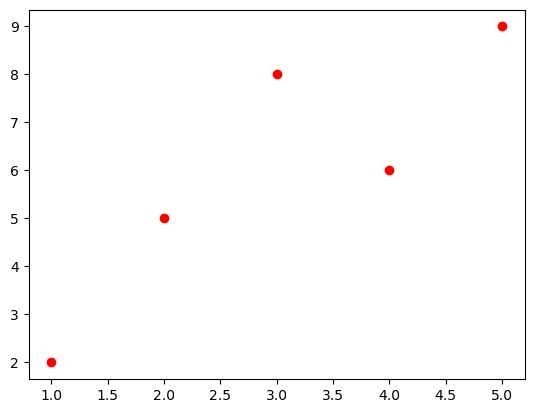

In [ ]:
# 다섯 개의 점 (1,2), (2,5), (3,8), (4,6), (5,9)을 좌표평면에 찍으면
B = np.array([[1,2],
              [2,5],
              [3,8],
              [4,6],
              [5,9]])
plt.scatter(B[:,0], B[:,1], color='red')

In [ ]:
# 이를 RREF로 풀면,
A_rref = A.rref()
A_rref

(Matrix([
 [1, 0, 0, 0, 0,      19],
 [0, 1, 0, 0, 0, -449/12],
 [0, 0, 1, 0, 0,   215/8],
 [0, 0, 0, 1, 0,  -85/12],
 [0, 0, 0, 0, 1,     5/8]]),
 (0, 1, 2, 3, 4))

In [ ]:
print(A_rref[0]) # RREF 매트릭스 부분
print(A_rref[1]) # 피벗 열의 인덱스 리스트

Matrix([[1, 0, 0, 0, 0, 19], [0, 1, 0, 0, 0, -449/12], [0, 0, 1, 0, 0, 215/8], [0, 0, 0, 1, 0, -85/12], [0, 0, 0, 0, 1, 5/8]])
(0, 1, 2, 3, 4)


In [ ]:
# 여기서 해만 추출하려면
A_rref_array = np.array(A_rref[0]) # RREF 매트릭스 부분만 numpy 배열로 변환
coef = A_rref_array.astype(float)[:,-1] # 마지막 열이 해 (계수들)
# 즉, 다항식의 계수들은 약 1.4, -4.7, 5.2, -2.1, 0.6 임을 알 수 있다.
# A_rref[1]는 피벗 열의 인덱스 리스트이다.
coef

array([ 19.        , -37.41666667,  26.875     ,  -7.08333333,
         0.625     ])

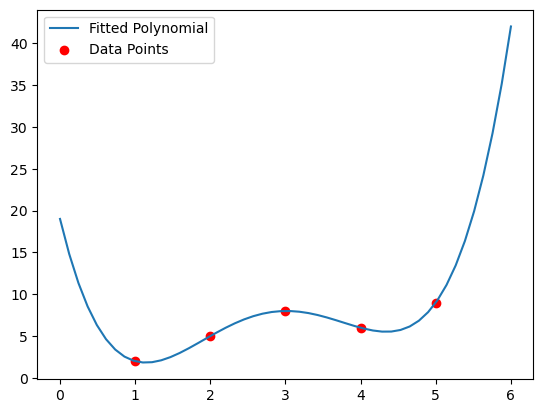

In [ ]:
#이제 이 계수들을 사용하여 다항식을 정의하고, 이를 이용해 그래프를 그릴 수 있다.
sp.symbols('x')
f = coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3 + coef[4]*x**4

# 다항식 그래프 그리기
# x 값 범위 설정
x_vals = np.linspace(0, 6) # 0부터 6까지
y_vals = coef[0] + coef[1]*x_vals + coef[2]*x_vals**2 + coef[3]*x_vals**3 + coef[4]*x_vals**4 # 다항식 값 계산: f(x_vals) 형태로 직접 계산
plt.plot(x_vals, y_vals, label='Fitted Polynomial') # 다항식 그래프 그리기
plt.scatter(B[:,0], B[:,1], color='red', label='Data Points') # 원래 데이터 점들도 함께 표시
plt.legend()
plt.show()